In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import jax.numpy as jnp
import jax.lax as jlx
from jax import jit as jit
import jax

In [33]:
df = pd.read_csv("Heart.csv")
df.reset_index()
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


<Axes: xlabel='Sex', ylabel='MaxHR'>

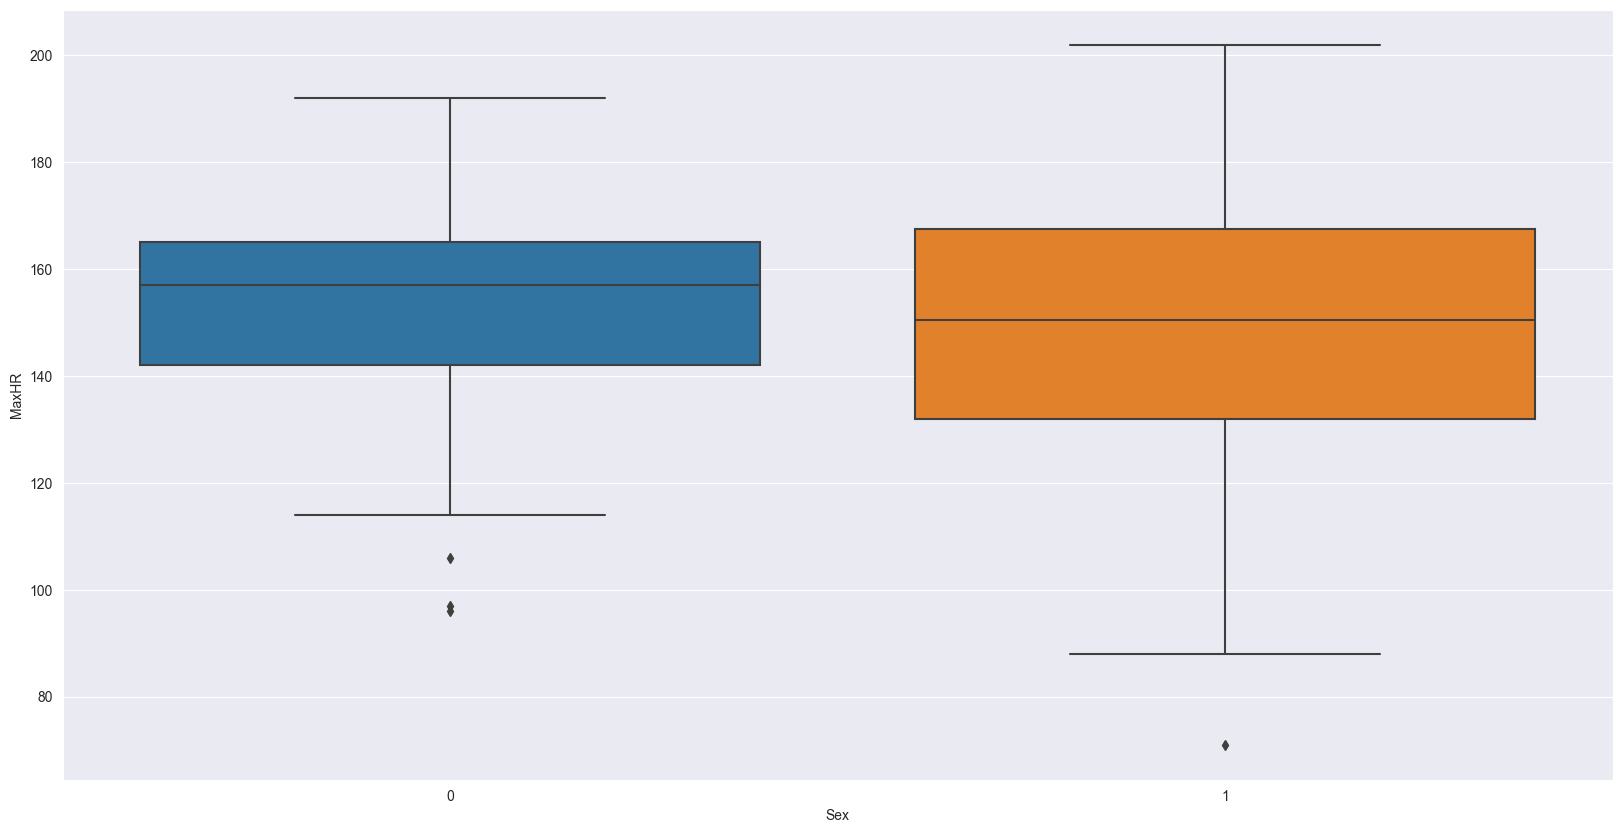

In [34]:
import seaborn as sns
sns.boxplot(data=df, x=df["Sex"], y=df["MaxHR"])
# anche qui (come sotto) potresti aggiungere hue --> e anche altri parametri, ovviamente

<Axes: xlabel='ChestPain', ylabel='RestBP'>

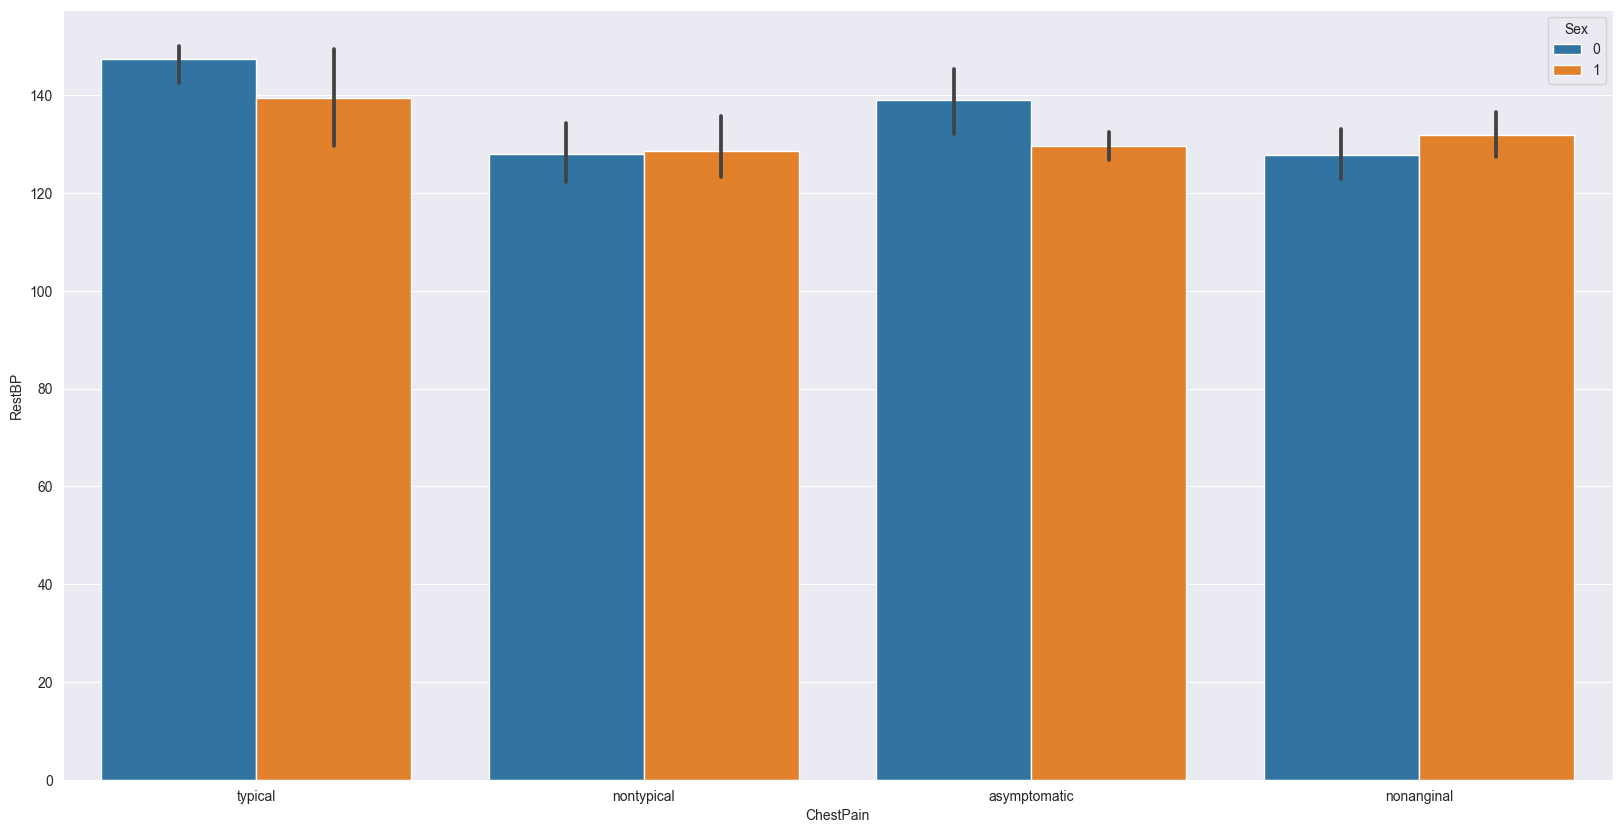

In [35]:
sns.barplot(data=df, x=df["ChestPain"], y=df["RestBP"], hue="Sex", order=["typical", "nontypical", "asymptomatic", "nonanginal"])
# rappresenta la media della variabile Y per ogni categoria della variabile X, inoltre puoi sottodividere in categorie la X

In [36]:
# data selection
df.drop("Unnamed: 0", axis=1, inplace=True)

In [37]:
# data encoding
df["ChestPain"] = df["ChestPain"].astype("category").cat.codes
df["Thal"] = df["Thal"].astype("category").cat.codes
df["AHD"] = df["AHD"].astype("category").cat.codes
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0,0
1,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1,1
2,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2,1
3,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1,0


In [38]:
df.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         0
AHD          0
dtype: int64

In [39]:
df.dropna(inplace=True)
df.shape

(299, 14)

In [40]:
x = df.drop("AHD", axis=1)
y = df["AHD"]

In [41]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=12)
x_train

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
137,62,1,2,120,281,0,2,103,0,1.4,2,1.0,2
11,56,0,2,140,294,0,2,153,0,1.3,2,0.0,1
193,62,0,0,138,294,1,0,106,0,1.9,2,3.0,1
111,56,1,0,125,249,1,2,144,1,1.2,2,1.0,1
187,66,1,2,160,246,0,0,120,1,0.0,2,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,58,0,2,136,319,1,2,152,0,0.0,1,2.0,1
130,54,1,1,120,258,0,2,147,0,0.4,2,0.0,2
243,61,1,3,134,234,0,0,145,0,2.6,2,2.0,1
255,42,0,1,120,209,0,0,173,0,0.0,2,0.0,1


In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
# il model non deve sapere niente dei dati di test

In [43]:
x_train, y_train, len(x_train)

(array([[ 0.87986288,  0.6680094 ,  1.20476731, ...,  0.60598455,
          0.34914581,  1.09412466],
        [ 0.19679473, -1.49698492,  1.20476731, ...,  0.60598455,
         -0.7061376 , -0.52301564],
        [ 0.87986288, -1.49698492, -0.85289876, ...,  0.60598455,
          2.45971263, -0.52301564],
        ...,
        [ 0.76601819,  0.6680094 ,  2.23360034, ...,  0.60598455,
          1.40442922, -0.52301564],
        [-1.39703096, -1.49698492,  0.17593427, ...,  0.60598455,
         -0.7061376 , -0.52301564],
        [ 1.79062042,  0.6680094 , -0.85289876, ...,  0.60598455,
          2.45971263, -0.52301564]]),
 137    1
 11     0
 193    1
 111    1
 187    1
       ..
 261    1
 130    0
 243    1
 255    0
 155    1
 Name: AHD, Length: 269, dtype: int8,
 269)

In [44]:
len(x_train[0])

13

In [45]:
y_train, y_test = y_train.to_numpy(), y_test.to_numpy()
type(x_train), type(y_test)

(numpy.ndarray, numpy.ndarray)

In [46]:
def initialize(layers_size):
  np.random.seed(0) # for reproducibility
  params = list()
  for i in range(len(layers_size) - 1):
    n, m = layers_size[i + 1], layers_size[i]
    params.append(np.random.normal(0, np.sqrt(2 / (n + m)), (n, m))) # matrix --> Normal(0, sqrt(2/n+m))
    params.append(np.zeros((n, ))) # vectors --> 0
  return params

def general_initialize(layers_size, num):
    return [initialize(layers_size) for _ in  range(num)]

layers = [1, 4, 2, 1]
size = 21
num = 13
params = general_initialize(layers, num)
#len(params), len(params[0]), len(params[0][0])

In [47]:
def flat_list_into_numpy(params):
    return np.concatenate([np.concatenate([p.reshape((-1, )) for p in par]) for par in params])

print(flat_list_into_numpy(general_initialize(layers, num)).shape)

def unpack_params(w):
    params_list = list()
    idx, length = 0, 0
    for i in range(len(layers) - 1):
        length = layers[i] * layers[i + 1]
        params_list.append(w[idx: idx + length].reshape((layers[i + 1], layers[i])))
        idx += length

        length = layers[i + 1]
        params_list.append(w[idx: idx + length])
        idx += length
    return params_list

def unpack_params_general(w):
    return [unpack_params(w[(i - 1) * size: i * size]) for i in range(1, num + 1)]

unpack_params_fast = jit(unpack_params_general)
params = unpack_params_fast(flat_list_into_numpy(params))
#len(params), len(params[0]), len(params[0][0])

(273,)


In [48]:
def ANN_layer(data, params):
    W, b = params
    return jlx.map(lambda x: jnp.dot(W, x) + b, data)

ANN_layer_fast = jit(ANN_layer)

def ANN_single(x, params):
  res = x
  for i in range(0, len(params), 2):
      res = jnp.tanh(ANN_layer_fast(res, params[i:i + 2]))
  return res

ANN_single_fast = jit(ANN_single)

def ANN(x, params):
    res = list()
    for i in range(len(x[0])):
        res.append(ANN_single_fast(x[:, i].reshape((-1, 1)), params[i])[:, 0])
    res = jnp.array(res).T
    res = jlx.map(lambda v: jnp.sum(v), res)
    return 1 / (1 + jnp.exp(-res))

ANN_fast = jit(ANN)

def ANN_scores(x, params): # x must be a single datapoint
    x = x.reshape((1, -1))
    res = list()
    for i in range(len(x[0])):
        res.append(ANN_single_fast(x[:, i].reshape((-1, 1)), params[i]))
    return jnp.array(res).reshape((-1, ))

ANN_scores_fast = jit(ANN_scores)

#print(ANN_scores_fast(x_train[0], params))
#ANN_fast(x_train, params)
ANN_fast(x_train, params).shape

(269,)

In [49]:
lam = 1

def reg_loss(params):
    tot, n = 0, 0
    for par in params:
        for i in range(0, len(par), 2):
            tot += jnp.sum(jnp.square(par[i]))
            n += par[i].shape[0] * par[i].shape[1]
    return (lam / n) * tot

reg_loss_fast = jit(reg_loss)

def loss(x, y, params):
    pred = jnp.clip(ANN_fast(x, params), 1e-7, 1 - 1e-7)
    term_0 = (1 - y) * jnp.log(1 - pred)
    term_1 = y * jnp.log(pred)
    return -jnp.mean(term_0 + term_1) + reg_loss_fast(params)

def accuracy(x, y, params):
    pred = jnp.round(ANN_fast(x, params))
    wrong = jnp.mean(
        jlx.map(lambda i: jnp.sign(jnp.absolute(pred[i] - y[i])), jnp.array(range(len(y))))
    )
    return 1 - wrong

acc_fast = jit(accuracy)
#print(acc_fast(x_train, y_train, params))

params = general_initialize(layers, num)
loss_fast = jit(loss)
grad_fast = jit(jax.grad(loss_fast, argnums=2))
g = grad_fast(x_train, y_train, params)
#len(g), len(g[0]), len(g[0][0])

In [50]:
from tqdm.notebook import tqdm

epochs = range(500)
alpha = 1e-3
lr_min = 1e-2
lr_max = 1e-1
lr = 1e-1
dec_lr = lambda i: max(lr_min, lr_max * (1 - i / len(epochs))) # linear decay

w = flat_list_into_numpy(general_initialize(layers, num))

history_train = list()
history_test = list()
accuracy_train = list()

lam = 1

m = np.zeros(w.shape)
v = np.zeros(w.shape)
eps = 1e-8
beta_1, beta_2 = 0.9, 0.999

for epoch in tqdm(epochs):
    lr = dec_lr(epoch)
    grads = flat_list_into_numpy(grad_fast(x_train, y_train, unpack_params_fast(w)))

    m = beta_1 * m + (1 - beta_1) * grads
    v = beta_2 * v + (1 - beta_2) * np.square(grads)

    m_hat = m / (1 - np.power(beta_1, epoch + 1))
    v_hat = v / (1 - np.power(beta_2, epoch + 1))

    w -= lr * m_hat / (np.sqrt(v_hat) + eps)

    history_train.append(loss_fast(x_train, y_train, unpack_params_fast(w)))
    history_test.append(acc_fast(x_test, y_test, unpack_params_fast(w)))
    accuracy_train.append(acc_fast(x_train, y_train, unpack_params_fast(w)))
    if history_test[-1] <= alpha:
        print("\n\nFull Convergence\n")
        break

  0%|          | 0/500 [00:00<?, ?it/s]

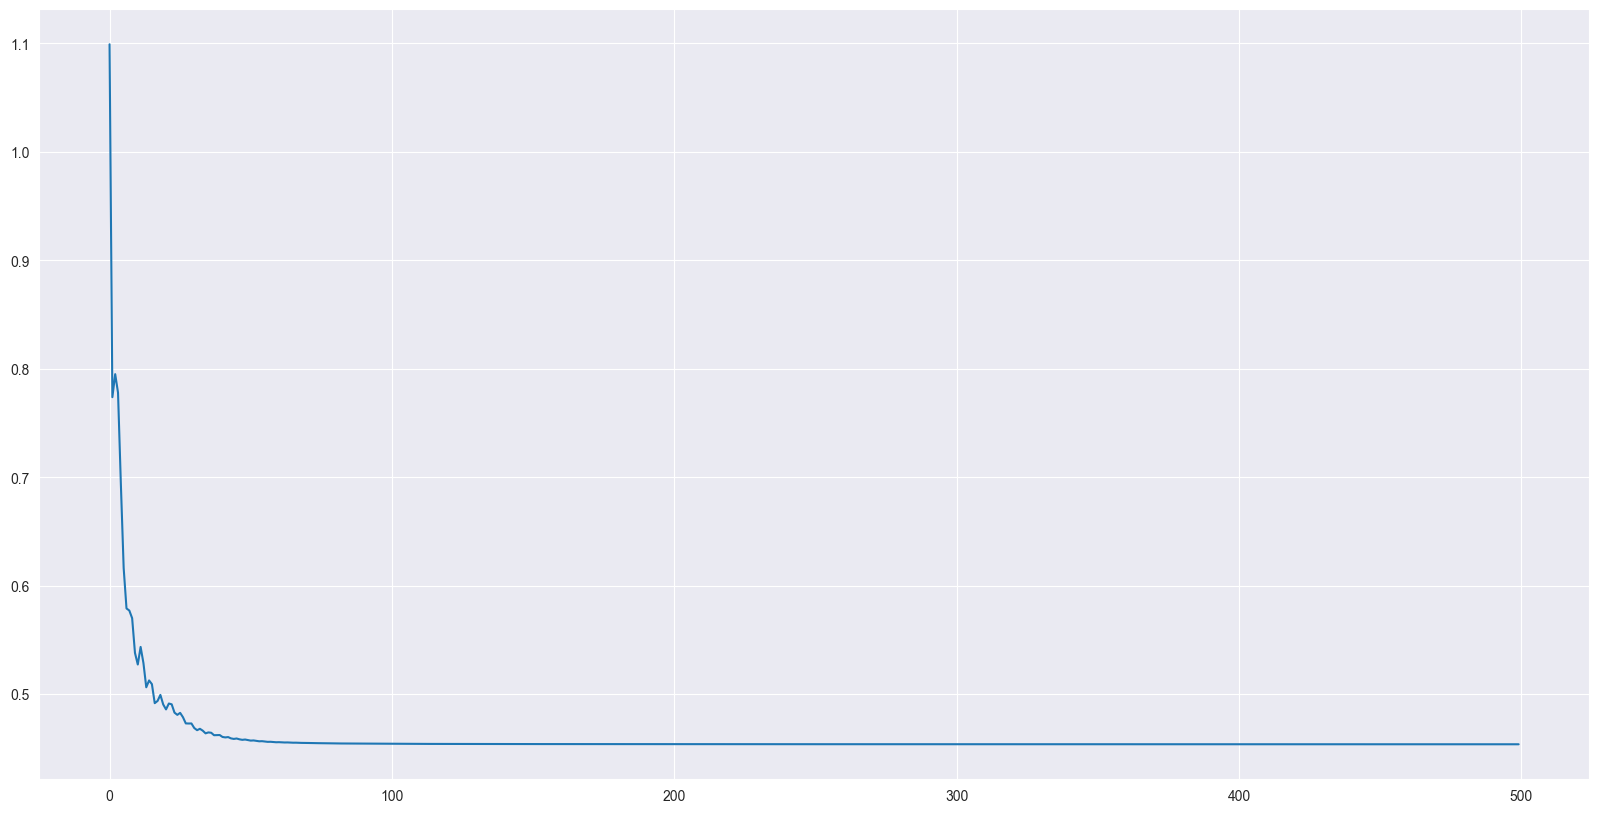

In [51]:
plt.plot(history_train);

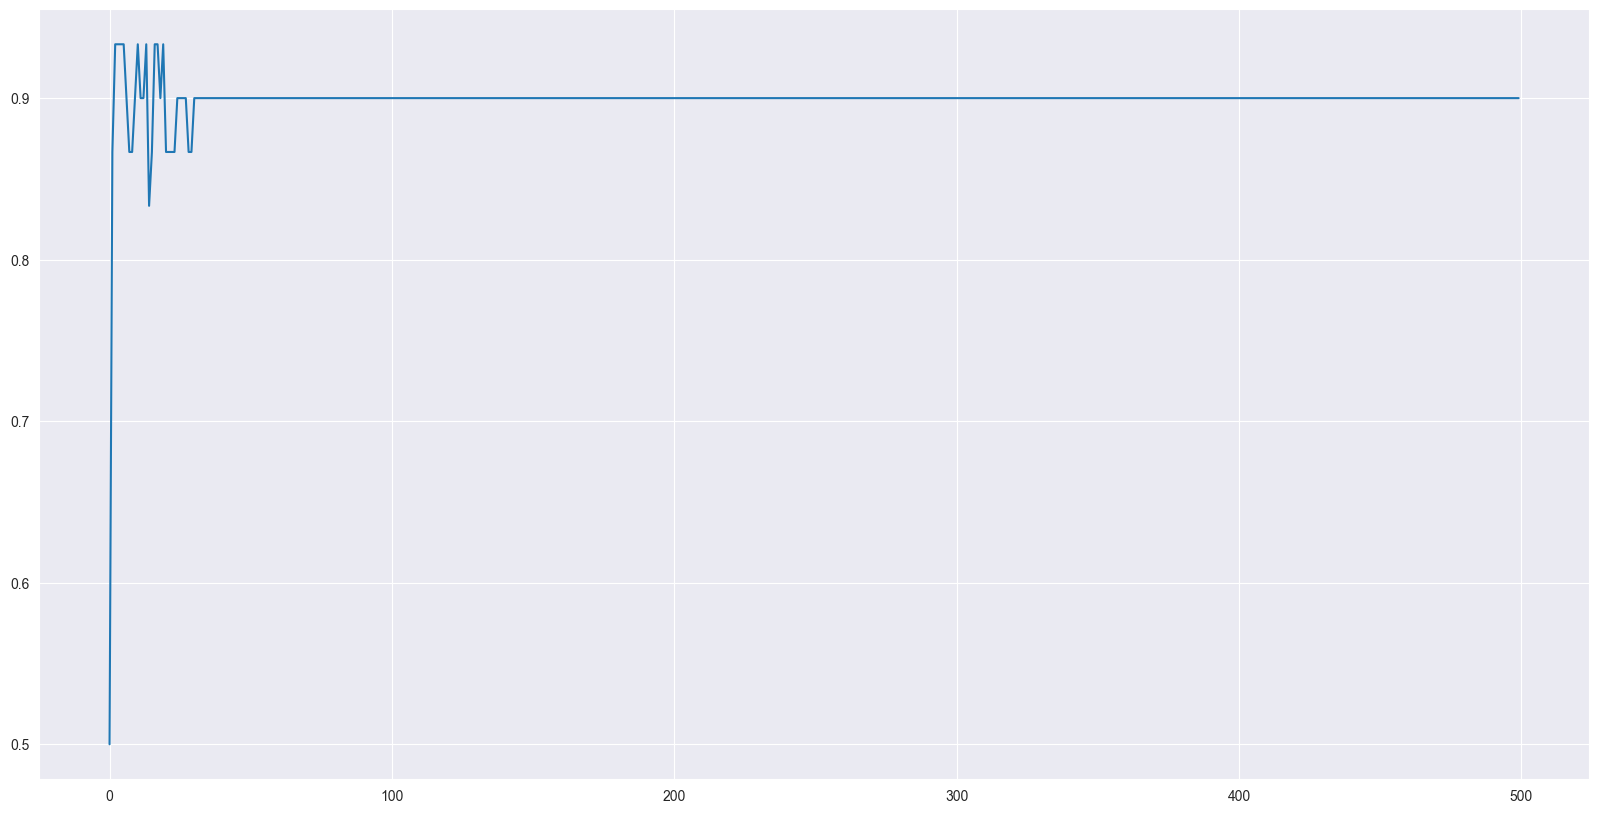

In [52]:
plt.plot(history_test);

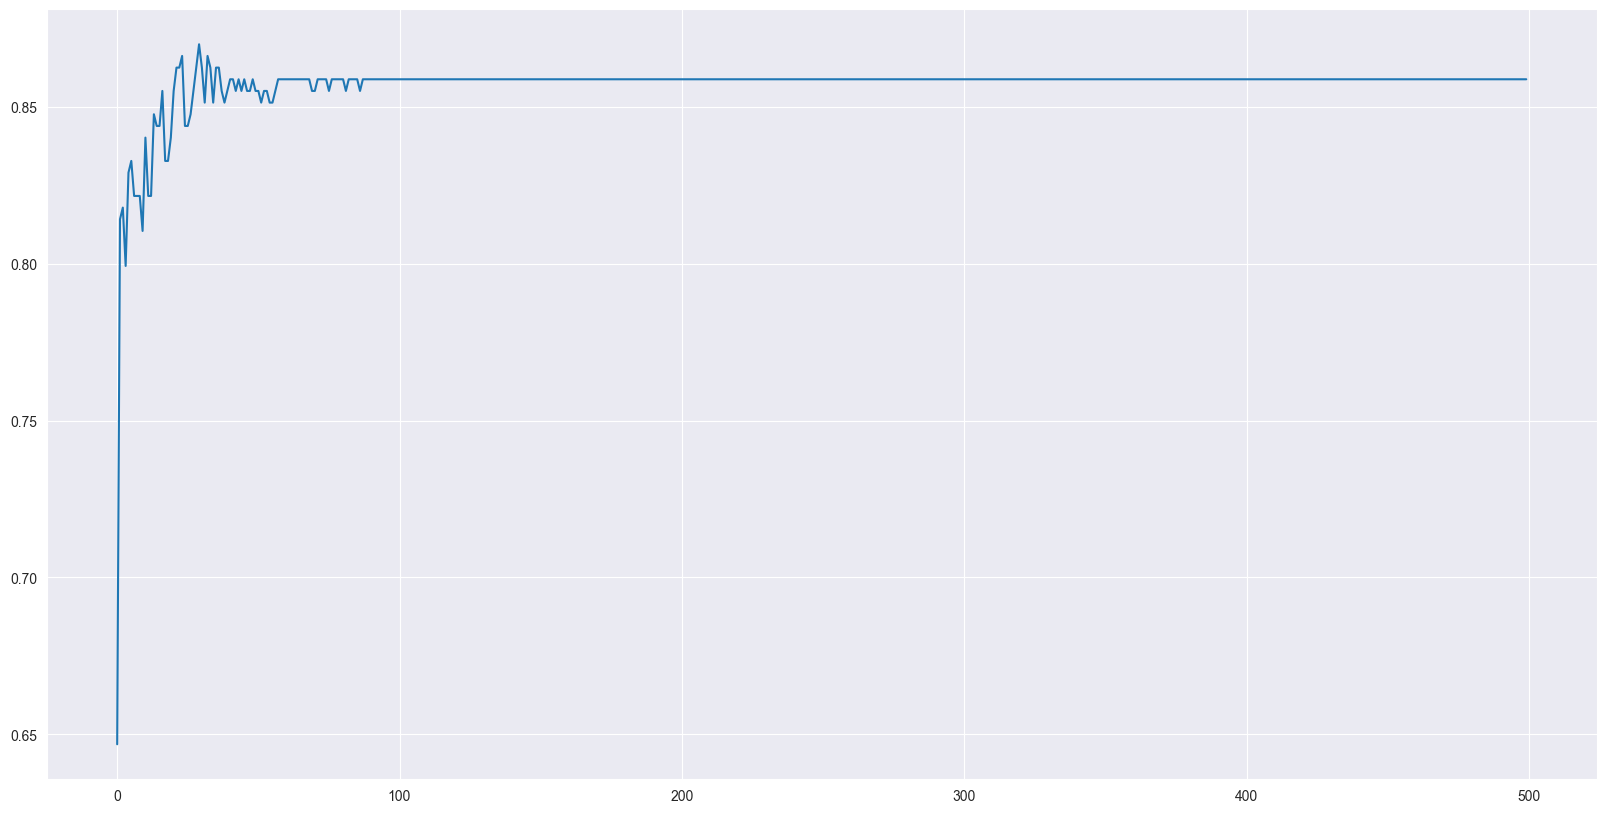

In [53]:
plt.plot(accuracy_train);

In [54]:
print(f"The final accuracy on testing dataset is: {np.round(acc_fast(x_test, y_test, unpack_params_fast(w)), 2) * 100}%")

The final accuracy on testing dataset is: 90.0%


# Consider the third sample

In [55]:
sample = 3
pred = np.round(ANN_fast(x_train[sample].reshape((1, -1)), unpack_params_fast(w)))[0]
real = y_train[sample]
print(pred, real) # label = 1 --> no-disease, label = 0 --> disease

1.0 1


In [56]:
weights = ANN_scores_fast(x_train[sample], unpack_params_fast(w))
weights

Array([ 0.12107632,  0.33625358,  0.47637534, -0.17122693,  0.08905432,
        0.10555614,  0.10164096,  0.08642134,  0.1681759 , -0.15623374,
        0.3567313 ,  0.5362085 , -0.570713  ], dtype=float32)

In [57]:
weights = (np.absolute(weights) / np.sum(np.absolute(weights))) * np.sign(weights)
weights *= 100

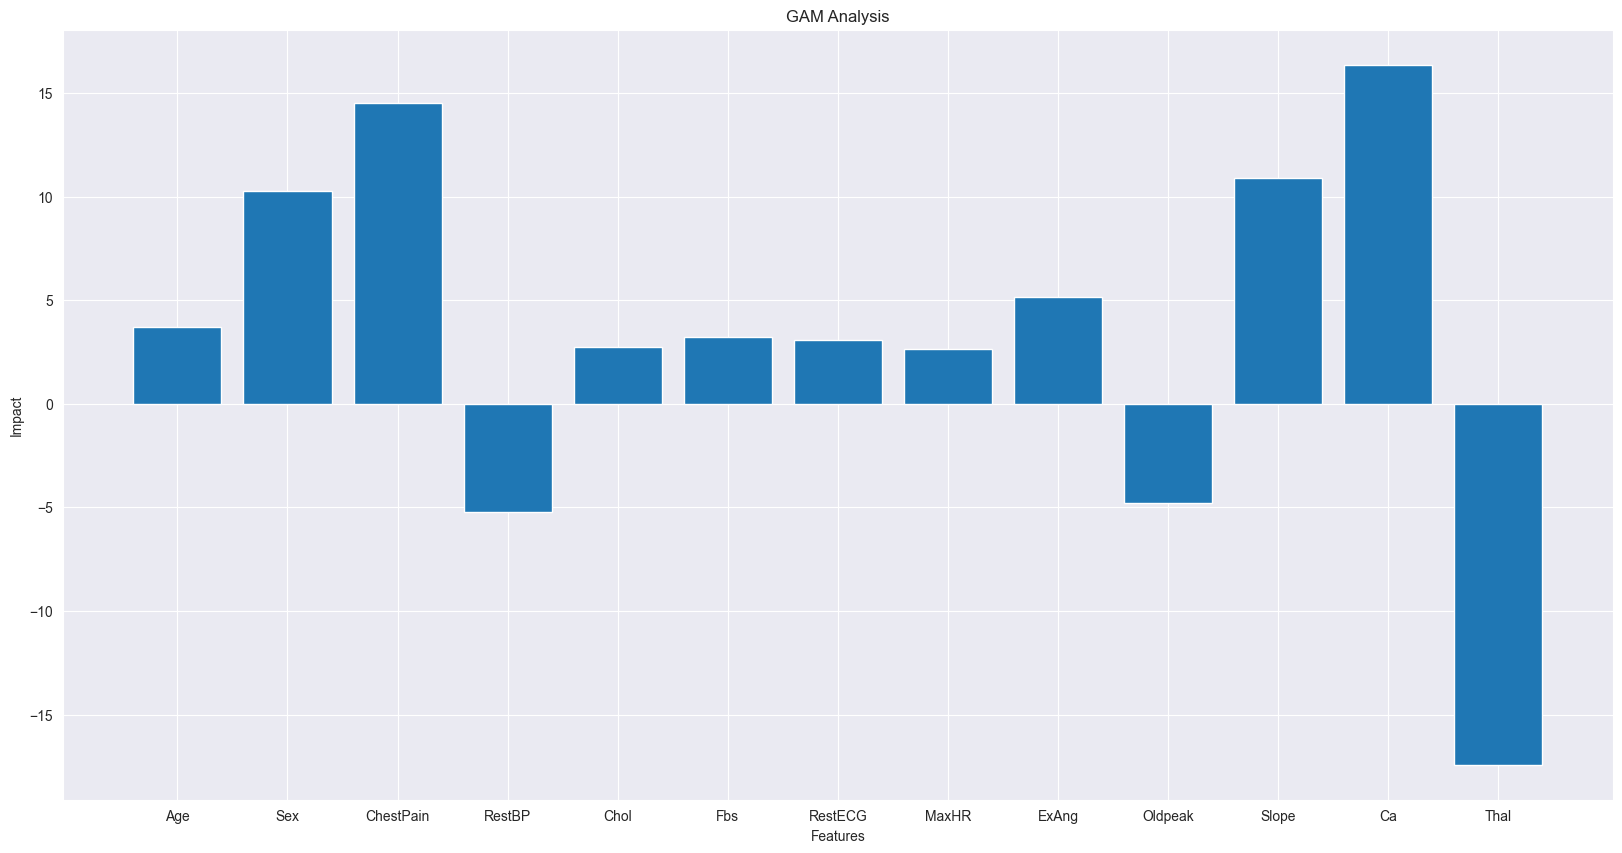

In [58]:
labels = x.columns
plt.rcParams["figure.figsize"] = (20, 10)

plt.title("GAM Analysis")
plt.xlabel("Features")
plt.ylabel("Impact")

plt.bar(labels, weights);

In [59]:
# chest pain value --> a very impactful feature, in this case --> positive impact means prediction towards one
# by the way, not every feature is really important --> usually you can find useless feature in all datasets
# you should analyze all the samples and see the average contribution of each feature (in absolute value)
x_train[sample][2], x_train[:, 2].mean()
# Chest Pain under the mean --> it makes sense to predict for no-disease (value = 1) --> exactly what happens

(-0.8528987601220323, -6.603557023792752e-18)

In [60]:
weights = np.zeros(len(x_train[0]))
for point in x_train:
    weights += np.absolute(ANN_scores_fast(point, unpack_params_fast(w)))
weights = weights / np.sum(weights)
weights *= 100

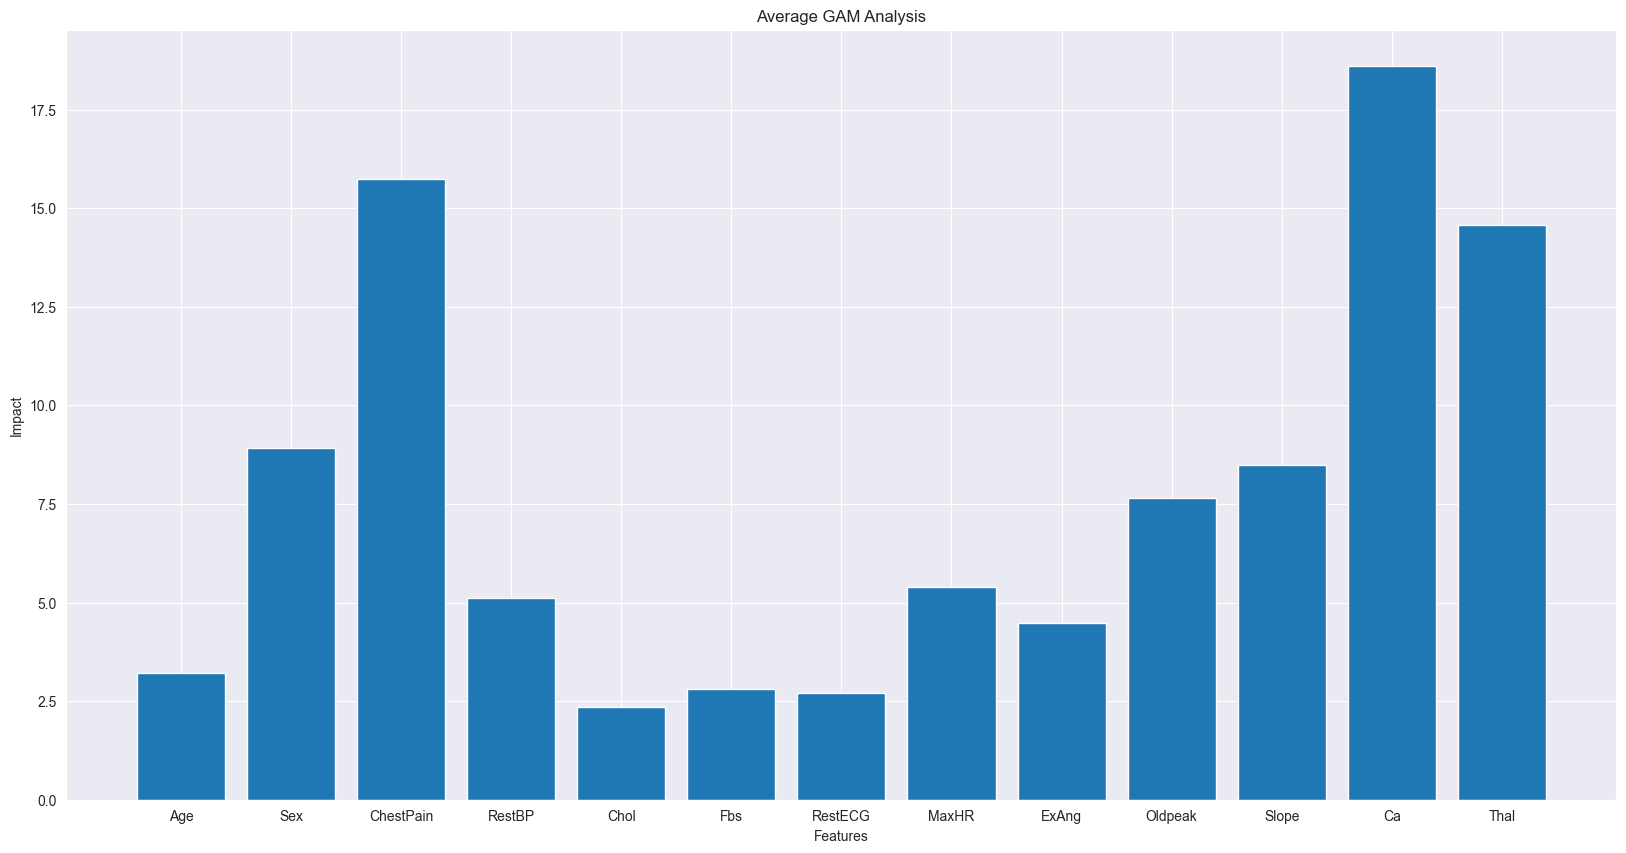

In [61]:
labels = x.columns

plt.title("Average GAM Analysis")
plt.xlabel("Features")
plt.ylabel("Impact")

plt.rcParams["figure.figsize"] = (20, 10)
plt.bar(labels, weights);

In [62]:
# Now we can clearly see which features are important and which are not --> you might drop them, for simplicity